In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style = 'whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tennis_df = pd.read_csv('ATP_complete.csv')

In [3]:
tennis_df.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN


In [4]:
tennis_df.shape

(172499, 49)

In [5]:
tennis_df.columns

Index(['best_of', 'draw_size', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_ace', 'l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'loser_age',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc',
       'loser_name', 'loser_rank', 'loser_rank_points', 'loser_seed',
       'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_date',
       'tourney_id', 'tourney_level', 'tourney_name', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df',
       'w_svpt', 'winner_age', 'winner_entry', 'winner_hand', 'winner_ht',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_rank',
       'winner_rank_points', 'winner_seed'],
      dtype='object')

In [6]:
# what kind of tournaments do we have?
tennis_df.tourney_level.value_counts()

A    111405
G     25139
M     21652
D     13860
F       443
Name: tourney_level, dtype: int64

In [7]:
# Create new column storing year/month
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]

In [8]:
# Create new column storing year as integer
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]
tennis_df['tourney_year'] = tennis_df['tourney_year'].astype(int)

Text(0, 0.5, 'Unique players')

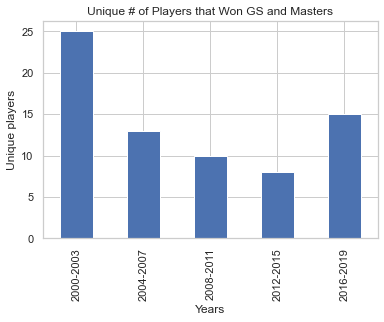

In [9]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2000,2003))].agg({'winner_name':'nunique'})
t = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2004,2007))].agg({'winner_name':'nunique'})
u = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2008,2011))].agg({'winner_name':'nunique'})
v = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2012,2015))].agg({'winner_name':'nunique'})
w = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2016,2019))].agg({'winner_name':'nunique'})

s['2000-2003'] = s['winner_name']
s=s.drop('winner_name')
t['2004-2007'] = t['winner_name']
t=t.drop('winner_name')
u['2008-2011'] = u['winner_name']
u=u.drop('winner_name')
v['2012-2015'] = v['winner_name']
v=v.drop('winner_name')
w['2016-2019'] = w['winner_name']
w=w.drop('winner_name')

dfl = [s,t,u,v,w]
dfs = pd.concat(dfl)
x = pd.DataFrame(dfs, columns=['Unique_Count']).reset_index()
x.columns=['Year_Range','Unique_Winners']
x.plot('Year_Range', 'Unique_Winners', kind='bar', title='Unique # of Players that Won GS and Masters', legend=False)
plt.xlabel('Years')
plt.ylabel('Unique players')

<bound method Series.count of 60           Bill Bowrey
317          Arthur Ashe
920            Rod Laver
934         Ken Rosewall
1303           Rod Laver
               ...      
169304    Novak Djokovic
170411      Rafael Nadal
170708    Novak Djokovic
171258      Rafael Nadal
172031    Novak Djokovic
Name: winner_name, Length: 208, dtype: object>


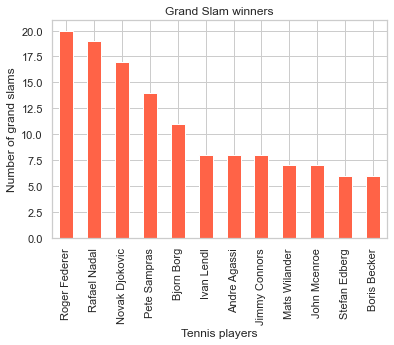

In [10]:
# Most majors
gs_winner_df = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['round'] == 'F')]
grouped = gs_winner_df.groupby('winner_name').count().sort_values('winner_id', ascending= False).reset_index()
grouped = grouped[(grouped['best_of'] > 5)]

print(gs_winner_df['winner_name'].count)

#plt.figure()
#plt.figure(figsize=(50,25))

grouped[['winner_name', 'best_of']].plot.bar(color = 'tomato', x = 'winner_name', legend = None)
#sns.barplot(x = 'winner_name', kind = 'count', hue = 'tourney_name', data = grouped )

plt.xlabel('Tennis players')
plt.ylabel('Number of grand slams')
plt.title('Grand Slam winners')
#plt.savefig('grandslam_winners.png')
plt.show()

#TO DO highlight first 3 with different color

<bound method Series.count of 134        William Harris
633             Tom Okker
1608        John Newcombe
2103         Cliff Richey
2227         Cliff Richey
               ...       
170176       Rafael Nadal
170975       Rafael Nadal
171030    Daniil Medvedev
171429    Daniil Medvedev
171627     Novak Djokovic
Name: winner_name, Length: 363, dtype: object>


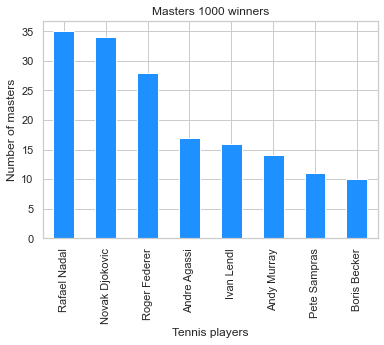

In [11]:
# Most majors
master_winner_df = tennis_df[(tennis_df['tourney_level'] == 'M') & (tennis_df['round'] == 'F')]
grouped = master_winner_df.groupby('winner_name').count().sort_values('winner_id', ascending= False).reset_index()
grouped = grouped[(grouped['best_of'] > 9)]
grouped[['winner_name', 'best_of']].plot.bar(x = 'winner_name', color = 'dodgerblue', legend = None)

print(master_winner_df['winner_name'].count)

#plt.figure(figsize=(30,18))
plt.xlabel('Tennis players')
plt.ylabel('Number of masters')
plt.title('Masters 1000 winners')
plt.savefig('masters_winners.png')
plt.show()

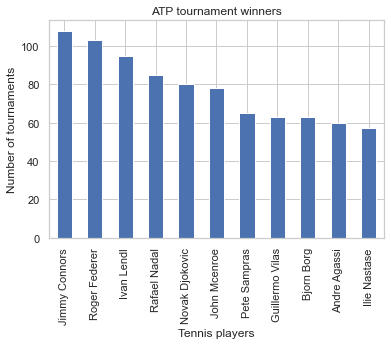

In [12]:
# Most majors
tourney_winner_df = tennis_df[(tennis_df['tourney_level'].isin(['M','G','F','A'])) & (tennis_df['round'] == 'F')]
grouped = tourney_winner_df.groupby('winner_name').count().sort_values('winner_id', ascending= False).reset_index()
grouped = grouped[(grouped['best_of'] > 50)]
grouped[['winner_name', 'best_of']].plot.bar(x = 'winner_name', legend = None)

#plt.figure(figsize=(30,18))
plt.xlabel('Tennis players')
plt.ylabel('Number of tournaments')
plt.title('ATP tournament winners')
plt.savefig('tourney_winners.png')
plt.show()

In [13]:
tourney_winner_df.groupby('winner_name').count().sort_values('winner_id', ascending= False).reset_index()

,winner_name,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,...,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_rank,winner_rank_points,winner_seed,tourney_yearmonth,tourney_year
0,Jimmy Connors,108,0,0,0,0,0,0,0,0,...,1,108,108,108,108,88,0,84,108,108
1,Roger Federer,103,3,103,103,103,103,103,103,103,...,0,103,103,103,103,103,103,97,103,103
2,Ivan Lendl,95,0,6,6,6,6,6,6,6,...,0,95,95,95,95,80,10,90,95,95
3,Rafael Nadal,85,5,85,85,85,85,85,85,85,...,1,85,85,85,85,85,85,85,85,85
4,Novak Djokovic,80,7,79,79,79,79,79,79,79,...,0,80,80,80,80,80,80,78,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Dan Cassidy,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,1,1
553,Peter Wessels,1,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,1,1
554,John Lloyd,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,1,1
555,Daniele Bracciali,1,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [14]:
federer_win = tennis_df[(tennis_df['winner_name'] == 'Roger Federer')]

In [15]:
federer_win.shape

(1250, 51)

In [16]:
federer_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 106428 to 172095
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_of             1250 non-null   int64  
 1   draw_size           50 non-null     float64
 2   l_1stIn             1189 non-null   float64
 3   l_1stWon            1189 non-null   float64
 4   l_2ndWon            1189 non-null   float64
 5   l_SvGms             1189 non-null   float64
 6   l_ace               1189 non-null   float64
 7   l_bpFaced           1189 non-null   float64
 8   l_bpSaved           1189 non-null   float64
 9   l_df                1189 non-null   float64
 10  l_svpt              1189 non-null   float64
 11  loser_age           1250 non-null   float64
 12  loser_entry         170 non-null    object 
 13  loser_hand          1250 non-null   object 
 14  loser_ht            1200 non-null   float64
 15  loser_id            1250 non-null   int64  
 16 

In [17]:
fed_win_stat = federer_win[['surface', 'w_1stIn', 'w_1stWon','w_2ndWon','w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df','w_svpt']]

In [18]:
fed_win_stat.describe()

,w_1stIn,w_1stWon,w_2ndWon,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,46.248949,36.592935,16.478553,7.900757,3.518082,2.542473,1.673675,73.874685
std,17.011887,12.770935,6.297393,4.687210,3.391272,2.692599,1.647717,26.366370
min,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,34.000000,27.000000,12.000000,5.000000,1.000000,0.000000,0.000000,55.000000
50%,43.000000,35.000000,15.000000,7.000000,3.000000,2.000000,1.000000,69.000000
75%,55.000000,43.000000,20.000000,11.000000,5.000000,4.000000,2.000000,88.000000
max,127.000000,113.000000,46.000000,50.000000,26.000000,22.000000,12.000000,197.000000


In [19]:
fed_win_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 106428 to 172095
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   surface    1249 non-null   object 
 1   w_1stIn    1189 non-null   float64
 2   w_1stWon   1189 non-null   float64
 3   w_2ndWon   1189 non-null   float64
 4   w_ace      1189 non-null   float64
 5   w_bpFaced  1189 non-null   float64
 6   w_bpSaved  1189 non-null   float64
 7   w_df       1189 non-null   float64
 8   w_svpt     1189 non-null   float64
dtypes: float64(8), object(1)
memory usage: 97.7+ KB


In [20]:
fed_win_stat.head()

,surface,w_1stIn,w_1stWon,w_2ndWon,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt
106428,Hard,22.0,18.0,15.0,8.0,1.0,1.0,0.0,41.0
106437,Hard,43.0,32.0,18.0,8.0,4.0,4.0,3.0,73.0
107182,Hard,46.0,36.0,32.0,3.0,8.0,5.0,10.0,110.0
107198,Hard,73.0,63.0,19.0,12.0,5.0,3.0,5.0,115.0
107410,Carpet,71.0,58.0,21.0,14.0,2.0,1.0,2.0,111.0


In [21]:
fed_win_stat['surface'].value_counts()

Hard      786
Clay      224
Grass     189
Carpet     50
Name: surface, dtype: int64

Text(0.5, 1.0, '# first services won vs. aces of Federer (in matches he won)')

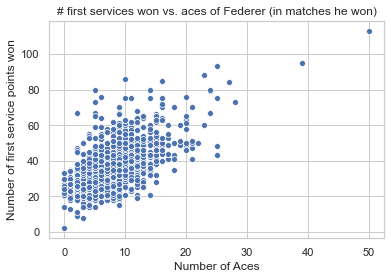

In [22]:
sns.scatterplot(x = 'w_ace', y = 'w_1stWon', data = fed_win_stat)
plt.xlabel('Number of Aces')
plt.ylabel('Number of first service points won')
plt.title('# first services won vs. aces of Federer (in matches he won)')
# sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", data=data)

In [23]:
federer_lose = tennis_df[(tennis_df['loser_name'] == 'Roger Federer')]

In [24]:
nadal_win = tennis_df[(tennis_df['winner_name'] == 'Rafael Nadal')]

#sns.boxplot( y=df["species"], x=df["sepal_length"] )
#sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic, dodge = True)

In [25]:
nadal_win.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed,tourney_yearmonth,tourney_year
118143,3,NaN,41.0,23.0,5.0,10.0,2.0,7.0,2.0,1.0,...,L,185.0,104745,ESP,Rafael Nadal,762.0,14.0,NaN,200204,2002
121245,3,NaN,23.0,13.0,6.0,7.0,3.0,6.0,2.0,8.0,...,L,185.0,104745,ESP,Rafael Nadal,109.0,337.0,NaN,200304,2003
121266,3,NaN,34.0,19.0,14.0,10.0,1.0,12.0,7.0,3.0,...,L,185.0,104745,ESP,Rafael Nadal,109.0,337.0,NaN,200304,2003
121298,3,NaN,12.0,2.0,3.0,3.0,0.0,3.0,0.0,0.0,...,L,185.0,104745,ESP,Rafael Nadal,96.0,426.0,NaN,200304,2003
121527,3,NaN,38.0,26.0,9.0,11.0,2.0,7.0,3.0,1.0,...,L,185.0,104745,ESP,Rafael Nadal,87.0,486.0,NaN,200305,2003


Text(0.5, 1.0, '# of breakpoints saved by Nadal')

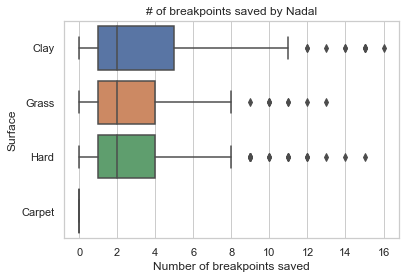

In [26]:
sns.boxplot( y=nadal_win["surface"], x=nadal_win["w_bpSaved"] )
plt.xlabel('Number of breakpoints saved')
plt.ylabel('Surface')
plt.title('# of breakpoints saved by Nadal')

In [27]:
djoko_win = tennis_df[(tennis_df['winner_name'] == 'Novak Djokovic')]

Text(0.5, 1.0, '# first serve points won of Djokovic competitors')

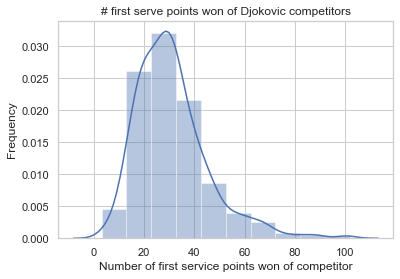

In [28]:
sns.distplot(djoko_win['l_1stWon'], kde = True, bins= 10)
plt.xlabel('Number of first service points won of competitor')
plt.ylabel('Frequency')
plt.title('# first serve points won of Djokovic competitors')